The arrival times depend on $U_{pq}$. Therefore, we can pose variational problem: to find $U_{pq}$ such that the rate at which the modes arrive into the light cone is minimal.

Suppose we have a semiinfinite chain of size $m$:

$$
\widehat{H}_{e}=\sum_{j=0}^{m-1}\left\{ \varepsilon_{j}\widehat{a}_{j}^{\dagger}\widehat{a}_{j}+h_{j}\widehat{a}_{j}^{\dagger}\widehat{a}_{j+1}+h_{j}\widehat{a}_{j+1}^{\dagger}\widehat{a}_{j}\right\}.
$$

We consider it on the time interval $\left[0,T_m\right]$ such that only the sites $0\ldots m$ are excited in a statistically significant way.

We want to find the frame rotation to other modes
$\widehat{\kappa}_{p}^{\dagger}=\sum_{q=0}^{\infty}\widehat{a}_{q}^{\dagger}U_{qp}$
such that the rate at which the modes arrive into the light cone is minimal.

'Minimal rate' is understood in the following sense. Given $m$ arrival times $t_{in}\left(\kappa_{1}\right) \ldots t_{in}\left(\kappa_{m}\right)$ (we assume that $\kappa_p$ are numbered in such a way that $t_{in}$ are increasing), we first find such a frame $U_m$ that $t_{in}\left(\kappa_{m}\right)$ is the latest possible. Then we fix $\kappa_m$ and $t_{in}\left(\kappa_{m}\right)$ and consider its orthogonal complement (which is a subspace with some basis $\kappa_{1} \ldots \kappa_{m-1}$).

We switch to the subspace $\kappa_{1} \ldots \kappa_{m-1}$ and continue in a recurrent way: we find such a frame rotation $U_{m-1}$ that $t_{in}\left(\kappa_{m-1}\right)$ is the latest possible, and so on.

## Hand-written notes on the recurrent procedure

<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_4.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_5.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_5-1.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_5-2.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_5-3.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_5-4.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_5-5.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_5-6.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_5-7.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_5-8.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_5-9.jpg" width="480" title="">
</div>

## Hand-written notes how to do one ineration

<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_5-10.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_6.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_7.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_8.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_9.jpg" width="480" title="">
</div>

## Hand-writen notes on numerical implementation

<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_28.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_29.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_30.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_31.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_32.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_33.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_34.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_35.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_36.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_37.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_38.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_39.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_40.jpg" width="480" title="">
</div>



The resulting minimal frame $U$ is found as a product:

$U = U_m \times U_{m-1} \otimes 1_m \times U_{m-2} \otimes 1_{m-1 \, m} \times \ldots \times U_{m-p} \otimes 1_{m-p \ldots m} \ldots \times U_2 \otimes 1_{2 \ldots m}$,

where by writing

$U_{m-p} \otimes 1_{m-p \ldots m}$ 

we take into account that $U_{m-p}$ is acting on the space of dimension $m-p$ (on the $p$-th step of recursion). Since we keep $\kappa_{p} \ldots \kappa_{m}$ fixed after the $p$-th step, we have identity operator in the subspace of $\kappa_{p} \ldots \kappa_{m}$, which is denoted as $1_{m-p \ldots m}$.

From the above explanation it is obvious that the minimal frame is found via the repeated application of the following operation:

given $m$ modes, find such $U_m$ that $t_{in}\left(\kappa_{m}\right)$ is the maximal possible.

Such $\kappa_{m}$ solves the extremum equation 

$\frac{\delta}{\delta \kappa_m} t_{in}\left(\kappa_{m}\right)=0$,

which is shown in our paper to be equivalent to the following condition:

at the time moment of arrival $t=t_{in}\left(\kappa_{m}\right)$, $\kappa_m$ is eigenvector of $\widehat{\rho}_{+}\left(t\right)$:

$
    \widehat{\rho}_{+}\left(t\right) \left|\kappa_m \right\rangle = a_{cut}  \left|\kappa_m \right\rangle.
$

Let us stress the difference:

For the general arrival time $t$ the following equality holds:

$\left\langle \kappa_m\right|\widehat{\rho}_{+}\left(t\right)\left|\kappa_m\right\rangle = a_{cut}$.

However if $t$ is the extremum (maximal), then the stronger eigenvalue equality holds.

<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_2.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
<img src="./pictures/pic_3.jpg" width="280" title="">
</div>

Before we begin numerical implementation, let us visualize eigenvalues of $\widehat{\rho}_{+}\left(t\right)$:

In [1]:
import numpy as np
import lightcones as lc
import lightcones.linalg as la
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [3]:
# chain
n_sites = 10
# on-site energies
es = [1]*n_sites
# hoppings
hs = [0.05]*(n_sites-1)

# time grid
dt = 0.01
nt = 8000

# spread
alpha = lc.spread(es, hs, nt, dt)

Let us choose $a_{cut}$ and plot eigenvalues of $\widehat{\rho}_{+}\left(t\right)$:

In [4]:
rel_tol = 10**(-6)

In [5]:
# Here we store the eigenvalues
I = np.zeros((n_sites, nt))

rho_plus = np.zeros((n_sites, n_sites), dtype = complex)

for i in range(nt):
    psi = la.as_column_vector(alpha[:, i])
    rho_plus += la.dyad(psi, psi) * dt
    It, _ = la.find_eigs_descending(rho_plus)
    I[:, i] = It.real

In [6]:
a_cut = I[0, -1] * rel_tol
a_cut

3.730652082091048e-05

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


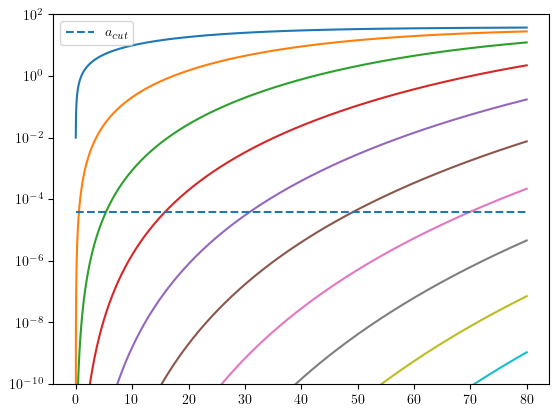

In [7]:
# Plot eigenvalue tracks ...
t = np.array(range(nt)) * dt
for i in range(n_sites):
    plt.plot(t, I[i, :])
# ...and the treshold a_cut
plt.plot(np.array([0, t[-1]]), np.array([a_cut, a_cut]), '--', label = "$a_{cut}$")
plt.yscale('log')
plt.ylim(10**(-10), 10**2)
plt.legend()
plt.savefig('extremality_criterion.eps', format='eps')

## Discussion of the last figure

<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_1-1.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_1-2.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_1-3.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_1-4.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_1-5.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_1-6.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_1-7.jpg" width="480" title="">
</div>
<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_1-8.jpg" width="480" title="">
</div>

From the last Fig. we observe the following:

1). Eigenvalues monotonically increase as they should (see our paper)

2). For the first 7 eigenvalues there are time moments where they cross the level $a_{cut}$. These are the time moments where the corresponding $t_{in}\left(\kappa_{p}\right),\,\,p=1...7$ are extremal.

3). The last 3 eigenvalues are always below the treshold. That means that either they arrive later then our considered $T_m=80$, or never arrive (formally, the corresponding $t_{in}=\infty$). Since we are interested only in the interval $\left[0, T_m\right]$, these last three modes are irrelevant for the quench problem, and we neglect them (see fidelity_relevant_subspace.ipynb).

4). The first 7 eigenvalues are the light cone interior normal modes (see light_cone_interior_normal_modes.ipynb)

In [8]:
# The code which counts the number of relevant modes for general parameter values:
g_metric = I[:, -1] - a_cut
inside_lightcone = g_metric > 0
n_rel = sum(inside_lightcone)
n_rel

7

In order to do the first iteration of the recurrent construction of the minimal frame, we consider the relevant mode of the smallest significance (i.e. mode no. n_rel). Here n_rel plays the role of $m$ in the explanation above: when describing the recurrent algorithm, we kept silent that in the minimal frame some modes can have $t_{in}>T_m$. Then the intersection of n_rel's eigenvalue with $a_{cut}$ yields $t_{in}\left(\kappa_{n\_rel}\right)$:

In [9]:
# propagate backwards in time, and look for the
# intersection of the last relevant eigenvalue
for i in reversed(range(0, nt)):
    g_metric = I[n_rel - 1, i] - a_cut
    if g_metric <= 0:
        break

ti_in_nrel = i
t_in_nrel = i * dt
t_in_nrel

69.72

We have found $t_{in}\left(\kappa_{n\_rel}\right)$, but we also need to find the rotation $U_{n\_rel}$,
which is found by diagonalizing $\widehat{\rho}_{+}\left(t\right)$. Therefore, we expand the last code sample:

In [10]:
# propagate backwards in time, and look for the
# intersection of the last relevant eigenvalue
rho_plus_ = np.copy(rho_plus)
for i in reversed(range(0, nt)):
    It, U = la.find_largest_eigs(rho_plus_, n_rel)
    g_metric = It[n_rel - 1] - a_cut
    if g_metric <= 0:
        break
    
    # propagate backwards one step further
    psi = la.as_column_vector(alpha[:, i])
    rho_plus_ -= la.dyad(psi, psi) * dt

U_n_rel = U

ti_in_nrel = i
t_in_nrel = i * dt
t_in_nrel

69.72

Observe the following. U_n_rel diagonalizes $\widehat{\rho}_{+}\left(t\right)$ for $t = t_{in}\left(\kappa_{n\_rel}\right)$. Therefore, in this frame  (where $\widehat{\rho}_{+}\left(t\right)$ is diagonal) the mode $\kappa_{n\_rel}$ is simply the n_rel-th standard basis element, i.e. 

<div style="border: 2px solid black; display: block; margin-bottom: 10px;">
    <img src="./pictures/pic_1.jpg" width="480" title="">
</div>



In [8]:
# Now we do the complete recurrent procedure 

# chain
n_sites = 15
# on-site energies
es = [1]*n_sites
# hoppings
hs = [0.05]*(n_sites-1)

# time grid
dt = 0.01
nt = 10000

# spread
spread = lc.spread(es, hs, nt, dt)

# rho_plus
rho_plus = lc.rho_plus(spread, dt)

# minimal light cone
rtol = 10**(-4)
ti_arrival, U_min, spread_min = lc.minimal_forward_frame(spread, rho_plus, dt, rtol)

Text(0, 0.5, '$m_{+}\\left(t\\right)$')

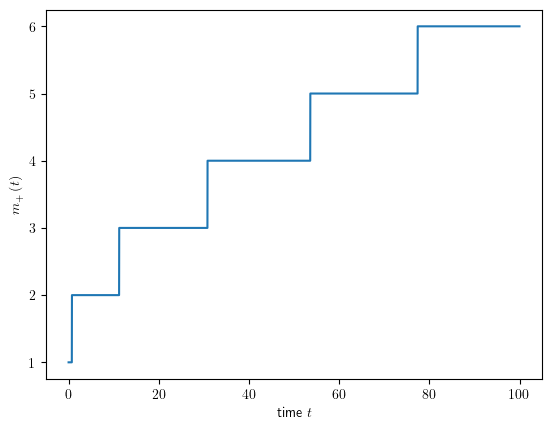

In [9]:
# let us plot the arrival times
t_arrival = np.array(ti_arrival) * dt

staircase = np.zeros(nt)
for i in range(len(t_arrival)):
    staircase[ti_arrival[i]:] += 1
    
# plot it 
t = np.array(range(nt)) * dt
plt.plot(t, staircase)
plt.xlabel(r"time $t$")
plt.ylabel(r"$m_{+}\left(t\right)$")

In [13]:
# Check that the minimal light cone does correctly reproduce the dynamics of the open quantum system


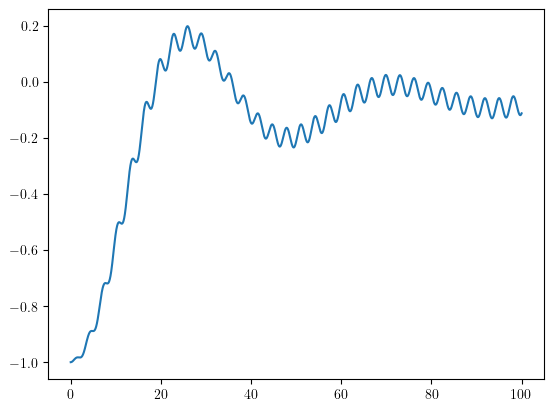

In [6]:
# First let us solve the spin boson model the original (chain sites) picture
# define the Hamiltonian of the spin-boson model

import numpy as np
from lightcones.linalg import mv
from lightcones import models
from lightcones.solvers.schrodinger import solve
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

# number of boson chain modes
num_chain_modes = 15

# keep in the truncated Fock space only states in which 
# the bosonic chain has no more than max_num_quanta quanta
max_num_quanta = 5

# sparse matrices for the model
m = models.spin_boson(num_chain_modes, max_num_quanta)

# Hamitonian for the spin (qubit)
# Rabi (level splitting)
Omega = 2.0
Hs = m.s_p @ m.s_m * Omega / 2

# Coupling to the chain via raising / lowering Pauli matrices
# coupling strength g
g = 0.05
V = g * m.s_m @ m.a_dag[0]
V_dag = V.T.conj()

# Free bosonic chain Hamiltonian (on-site energy e and hopping h)
e = 1.0
h = 0.05
Hb = e * sum([m.a_dag[i] @ m.a[i] for i in range(num_chain_modes)]) \
    + h * sum([m.a_dag[i + 1] @ m.a[i] + m.a_dag[i] @ m.a[i + 1] for i in range(num_chain_modes - 1)])
    
# joint Hamiltonian
Hsb = Hs + V + V_dag + Hb

# The qubit is periodically driven
def drive(t):
    return(0.1*np.cos(t)) * m.s_x

# The Hamiltonian for the driven spin-boson model
def Hsb_driven(t):
    return Hsb + drive(t)

# The non-stationary Schrodinger equation is solved on a time grid
# [0    dt    2*dt    ...    k*dt  ... ]
# The time grid points are numbered by integer ti
# [0    1     2       ....   k     ... ]
# The time-dependent Hamiltonian is invoked by the solver with ti argument,
# and the corresponding time moment is (ti + 0.5)*dt
# Here 0.5*dt is due to the midpoint integration rule

# Time step
dt = 0.01

# Final grid
t_max = 100
t = np.arange(0, t_max + dt, dt)
n_time = t.size

# Callback function which applies Hamiltonian to the wavefunction at each time grid point ti
def apply_h(ti, psi_in, psi_out):
    H = Hsb_driven((ti + 0.5) * dt)
    mv(H, psi_in, psi_out, cout=1)

# Here we store the average of observables
s_z_av = []

# Callback function which evaluates observables at each time grid point ti
def eval_o(ti, psi):
    s_z_av.append(np.vdot(psi, m.s_z @ psi))
    
# initial condition:
# vacuum state for bosonic chain,
# and ground state for spin (qubit)
psi_0 = np.zeros(m.dimension, dtype = complex)
psi_0[0] = 1.0 
    
# Solve the non-stationary Schrodinger equation
solve(0, n_time-1, dt, apply_h, psi_0, eval_o = eval_o)

# plot the s_z average 
s_z_av = np.array(s_z_av)
plt.plot(t, s_z_av.real)
# save picture to file
plt.savefig('s_z_av_spin_boson_model.eps', format='eps')

In [15]:

# Now solve the same problem in the minimal light cone frame
import numpy as np
from lightcones.linalg import mv
from lightcones import models
from lightcones.solvers.schrodinger import solve

num_modes = 15
max_num_quanta = 5
m = models.spin_boson(num_modes, max_num_quanta)

wq = 1.0
Hs = wq * m.s_p @ m.s_m
g = 0.05
V = g * m.s_m
V_dag = g * m.s_p

# Time step
dt = 0.01

# Final grid
t_max = 100
t = np.arange(0, t_max + dt, dt)
n_time = t.size

def f(ti):
    return(0.1*np.cos((ti + 0.5)*dt))

psi_0 = np.zeros(m.dimension, dtype = complex)
psi_0[0] = 1

Ht = None
Hint = m.space.zero_op

def begin_step(ti, psi):
    m_in = lc.m_in(ti_arrival, ti)
    global Hint
    if m_in > 0:
        Hint = V_dag @ sum(spread_min[: m_in, ti] * m.a[: m_in])
        Hint = Hint + Hint.conj().transpose()
    global Ht
    Ht = Hs + m.s_x * f(ti) + Hint
    
def apply_h(ti, psi_in, psi_out):
    mv(Ht, psi_in, psi_out)

# Here we store the average of observables
s_z_av_2 = []

def eval_o(ti, psi):
    s_z_av_2.append(np.vdot(psi, m.s_z @ psi))

solve(0, n_time-1, dt, apply_h, psi_0, begin_step = begin_step, eval_o = eval_o)

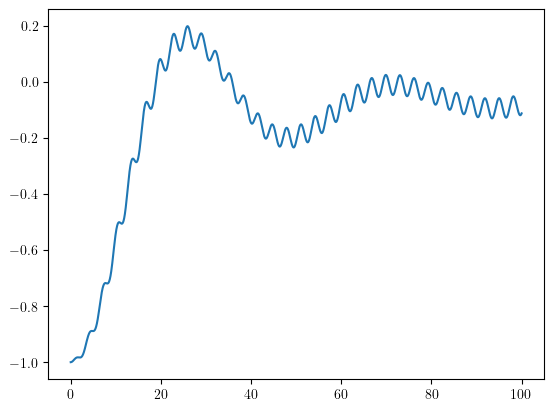

In [16]:
# plot the s_z average 
s_z_av_2 = np.array(s_z_av_2)
plt.plot(t, s_z_av_2.real)
# save picture to file
plt.savefig('s_z_av_spin_boson_model_in_min_lc.eps', format='eps')

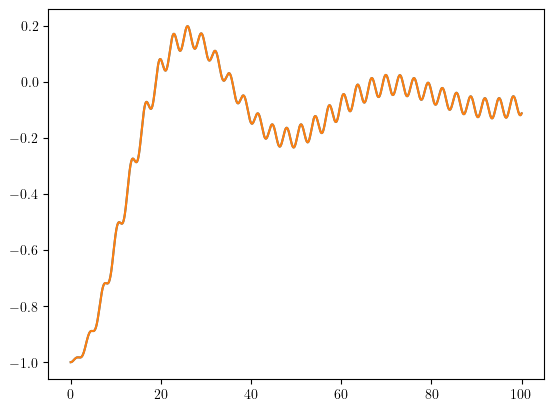

In [21]:
# Compare the averages

# plot the s_z average 
s_z_av = np.array(s_z_av)
s_z_av_2 = np.array(s_z_av_2)
plt.plot(t, s_z_av.real)
plt.plot(t, s_z_av_2.real)
# save picture to file
plt.savefig('s_z_av_spin_boson_model_compared.eps', format='eps')

In [22]:
# We see that the minimal light cone works correctly